# Homework (Part 1)

1. На датасете с лицами запустите PCA, какие компоненты выделилилсь?
2. На том же датасете запустите ICA. Получили ли вы более осмысленные представления?
3. Запустите k-means и DBSCAN и на этом датасете. Попадают ли одни и те же люди в один кластер?
4. Запустите t-sne для 2 компонент и затем DBSCAN, выделились ли отдельные кластеры с помощью t-sne? Визуализируйте результат.

In [1]:
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

from matplotlib import pyplot as plt
import numpy as np

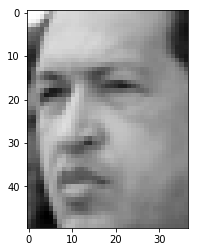

In [2]:
plt.imshow(lfw_people['data'][0].reshape(50,-1), cmap=plt.cm.Greys_r)

In [3]:
lfw_people['target_names']

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')

In [4]:
y = lfw_people['target']

In [5]:
X = lfw_people['data']

In [6]:
X.shape

(1288, 1850)

In [7]:
set(y)

{0, 1, 2, 3, 4, 5, 6}

# PCA

In [8]:
from sklearn.decomposition import PCA

0 0
1 0.1883172243833542
2 0.33898739516735077
3 0.4116772338747978
4 0.472024817019701
5 0.5234286971390247
6 0.5537582766264677
7 0.578513365238905
8 0.5995877031236887
9 0.6199614517390728
10 0.6391280516982079
11 0.6552778501063585
12 0.6703262152150273
13 0.6826441697776318
14 0.693436237052083
15 0.7039647484198213
16 0.7137462180107832
17 0.7229573195800185
18 0.7317410875111818
19 0.7399850459769368
20 0.7471250607632101
21 0.7539672031998634
22 0.7605259451083839
23 0.7666602153331041
24 0.7725565820001066
25 0.7779794628731906
26 0.7832703702151775
27 0.7883243705146015
28 0.7931129550561309
29 0.7976883025839925
30 0.8019291404634714
31 0.8058152464218438
32 0.8095212690532207
33 0.81310964981094
34 0.8166303967591375
35 0.8200367128010839
36 0.8232386210002005
37 0.8264181376434863
38 0.8294357964769006
39 0.8323238843586296
40 0.8351216076407582
41 0.8379078051075339
42 0.840630931314081
43 0.8432154895272106
44 0.8457813228014857
45 0.8481507014948875
46 0.850474498001858

Text(0.5,1,'Связь размерности и доли объясняемой дисперсии')

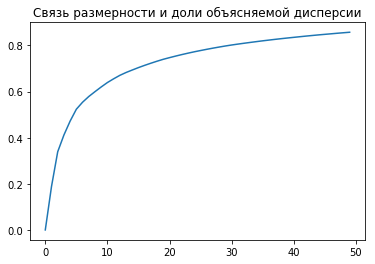

In [9]:
s = []
for i in range(50):
    pca_i = PCA(n_components=i)
    pca_i.fit(X)
    X_pca_i = pca_i.transform(X)
    s.append(sum(pca_i.explained_variance_ratio_))
    print(i, sum(pca_i.explained_variance_ratio_))
plt.plot(s)
plt.title("Связь размерности и доли объясняемой дисперсии")

In [10]:
# 18 компонент объясняют 73% дисперсии
pca = PCA(n_components=18)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=18, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

0.1883174


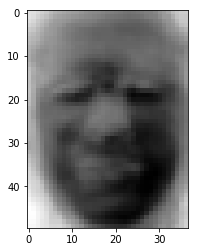

0.15066971


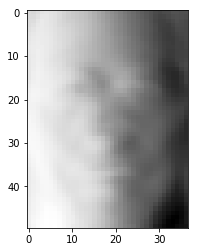

0.072689995


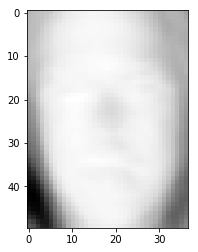

0.060347546


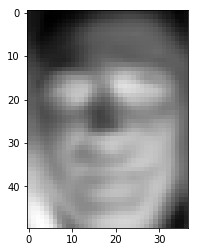

0.051403996


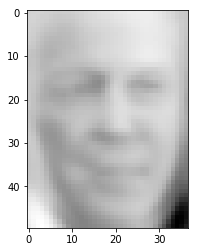

0.030329442


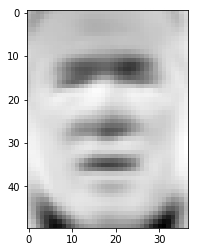

0.02475532


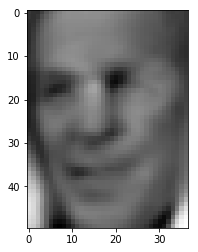

0.021074275


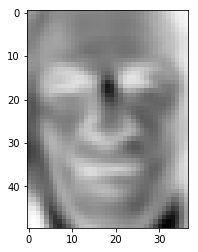

0.020373497


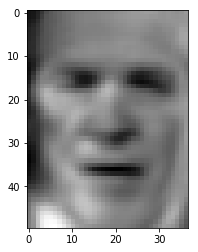

0.019166641


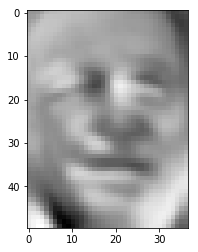

0.016150113


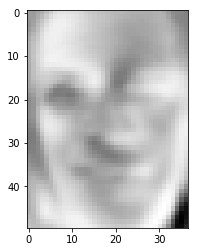

0.01504796


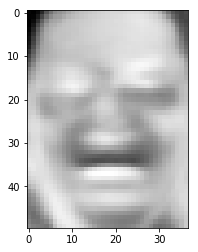

0.012318351


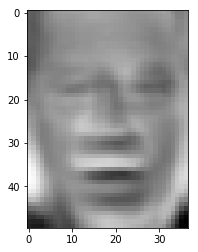

0.010791696


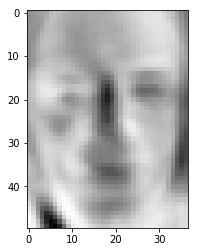

0.010529094


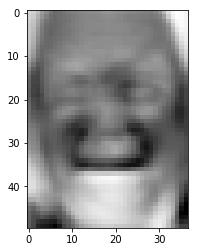

0.00978114


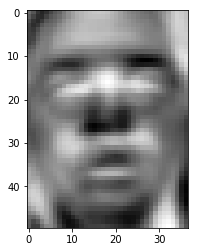

0.009211141


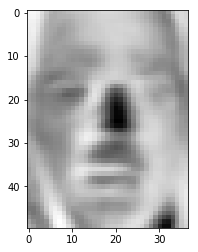

0.008784252


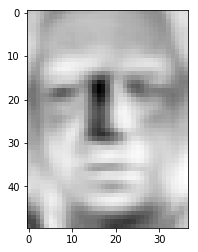

In [11]:
# выделяем 18 главных компонент
for i in range(18):
    print(pca.explained_variance_ratio_[i])
    plt.imshow(pca.components_[i].reshape(50, -1), cmap=plt.cm.Greys_r)
    plt.show()

In [12]:
pca.explained_variance_ratio_

array([0.1883174 , 0.15066971, 0.07269   , 0.06034755, 0.051404  ,
       0.03032944, 0.02475532, 0.02107427, 0.0203735 , 0.01916664,
       0.01615011, 0.01504796, 0.01231835, 0.0107917 , 0.01052909,
       0.00978114, 0.00921114, 0.00878425], dtype=float32)

In [13]:
sum(pca.explained_variance_ratio_)

0.7317415699362755

In [14]:
pca.components_.shape

(18, 1850)

# ICA

In [15]:
from sklearn.decomposition import FastICA

In [16]:
print(np.max(X), np.min(X))

255.0 0.0


In [17]:
X_scaling = X / 255

In [18]:
X_scaling.shape

(1288, 1850)

**Идея:** Рассмотрим задачу в следующей интерпретации:
1. У нас есть 1850 объектов (это число пикселей) и 1288 фичей
2. Мы рассматриваем для каждой из 1850 точки 1288 "каналов", из которых надо выбрать 7 максимально независимых (7 различных людей в датасете)
3. В такой интерпретации объекты и фичи меняются местами. Матрицу Х необходимо транспонировать.

In [19]:
X_scaling_T = X_scaling.T

In [20]:
X_scaling_T.shape

(1850, 1288)

In [21]:
ica = FastICA(n_components=7)

In [22]:
X_ica = ica.fit_transform(X_scaling_T) 

In [23]:
# обратный скоринг
X_ica = X_ica * 255

In [24]:
X_ica.shape

(1850, 7)

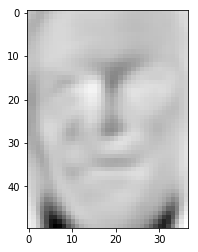

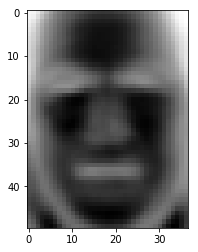

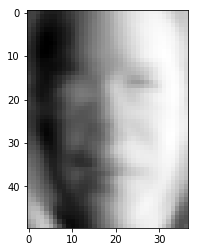

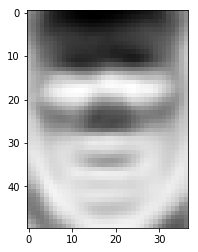

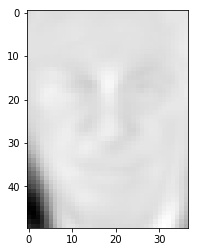

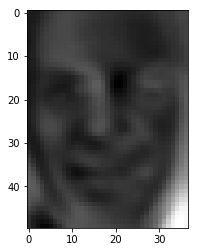

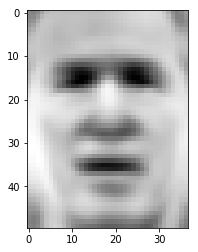

In [25]:
for i in range(7):
    plt.imshow(X_ica[:,i].reshape(50, -1), cmap=plt.cm.Greys_r)
    plt.show()


# TSNE

Спроецируем наши данные на плоскость

In [26]:
from sklearn.manifold import TSNE

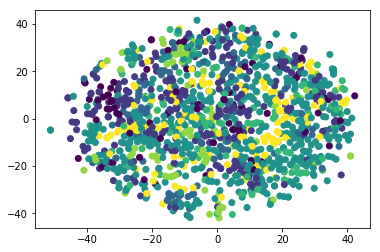

In [27]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)
plt.scatter(X_tsne[:,0], X_tsne[:, 1], c=y)

# k-means

In [28]:
from sklearn.cluster import KMeans

In [29]:
num_y = len(set(y))
num_y
# знаем, что 7 меток классов

7

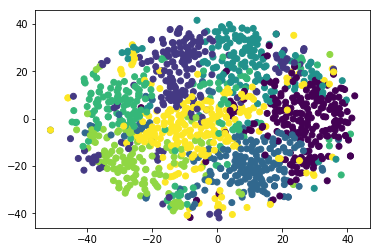

In [30]:
kmeans = KMeans(n_clusters=7)
kmeans.fit(X)
kmeans_labels = kmeans.predict(X)
plt.scatter(X_tsne[:,0], X_tsne[:, 1], c=kmeans_labels)

In [31]:
from sklearn.metrics import silhouette_score 

In [32]:
silhouette_score(X, kmeans_labels)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


0.05819434

In [33]:
X.shape

(1288, 1850)

In [34]:
kmeans_labels

array([6, 6, 2, ..., 1, 2, 6])

In [36]:
def distribution_clusters(X_data, y_data, labels, num_clusters):

    '''
    Создадим словарь разбиения на кластеры:
    ключ -- порядковый номер кластера (в общем случае не совпадает с целевой переменной у)
    значение -- список индексов (строк в матрице Х), которые kmeans отнес к одному кластеру

    Затем устраиваем голосование: сколько людей с какими реальными метками попали в один кластер.
    Строим столбчатую диаграмму для визуализации решения.
    '''

    dict_clusters = {} 
    for i in range(len(X_data)):
        number_of_cluster = labels[i]
        if number_of_cluster in dict_clusters:
            dict_clusters[number_of_cluster].append(i)
        else:
            dict_clusters[number_of_cluster] = [i]

    for key, value in dict_clusters.items():
        list_names_in_clusters = [0]*num_clusters  # голосовалка
        for j in value:
            true_label = y_data[j]
            list_names_in_clusters[true_label] += 1

        print(list_names_in_clusters)
        plt.title('Люди, попавшие в кластер с номером ' + str(key))
        plt.bar([c + 0.05 for c in set(y_data)|set(labels)], [d for d in list_names_in_clusters])
        plt.show()

    

[9, 43, 13, 117, 22, 22, 14]


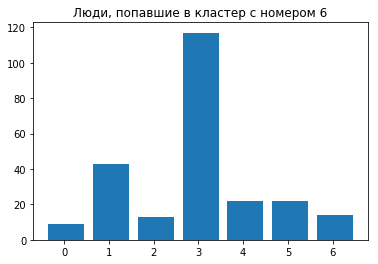

[7, 20, 14, 98, 19, 5, 31]


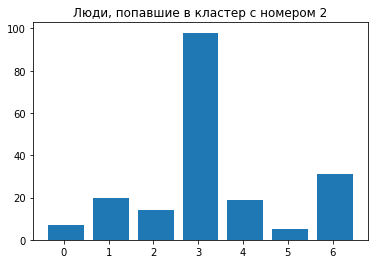

[7, 18, 15, 78, 8, 2, 21]


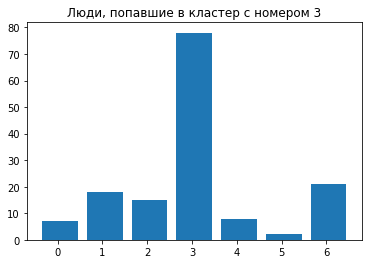

[6, 23, 11, 60, 8, 6, 18]


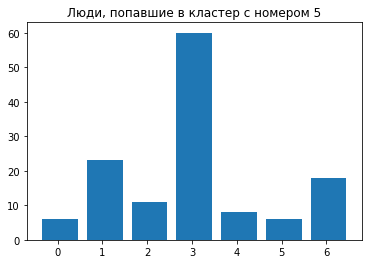

[12, 48, 22, 46, 16, 26, 14]


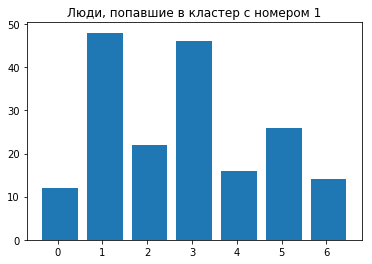

[27, 57, 27, 30, 8, 1, 16]


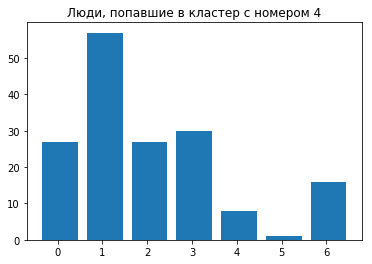

[9, 27, 19, 101, 28, 9, 30]


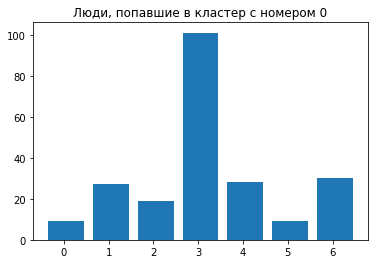

In [37]:
distribution_clusters(X, y, kmeans_labels, num_y)

**Вывод:** Формально, метод разбил людей на 7 кластеров. В идеале должно было получиться, что каждый кластер имеет "лидера по голосованию", однако это не так. Почти во всех кластерах преобрадает политик со значением целевой переменной равной 3.

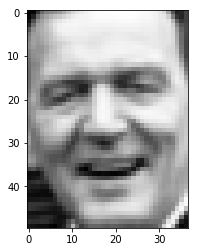

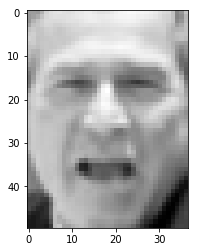

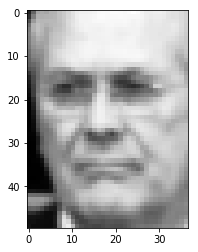

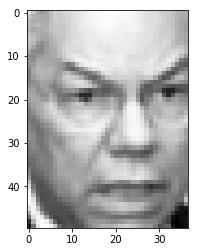

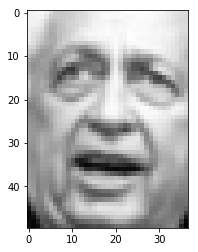

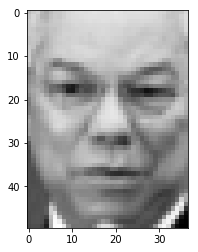

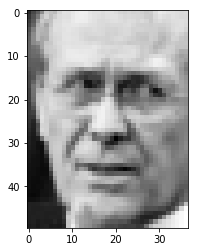

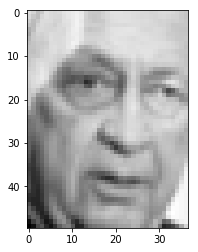

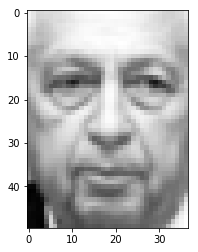

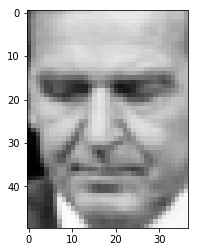

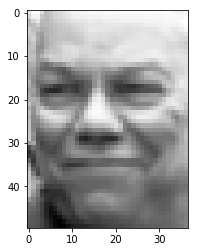

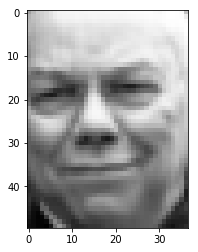

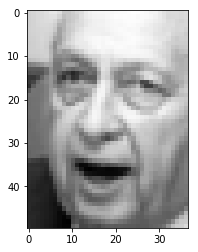

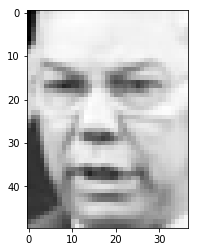

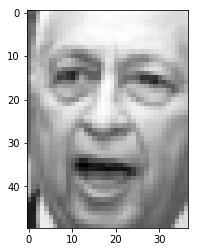

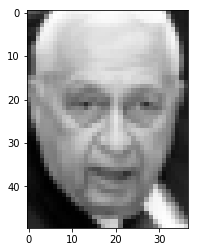

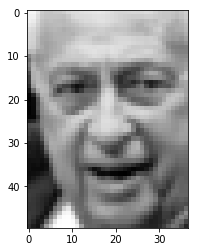

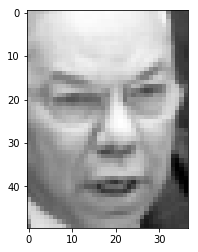

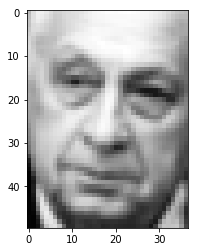

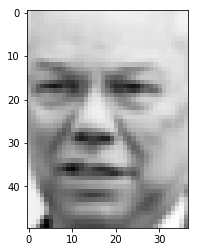

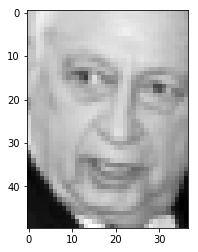

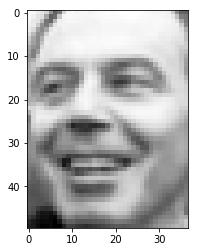

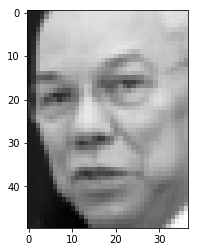

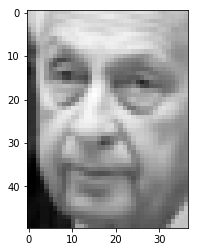

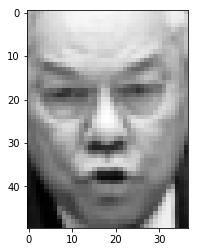

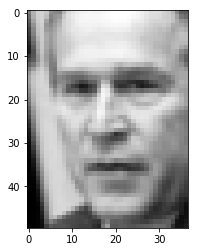

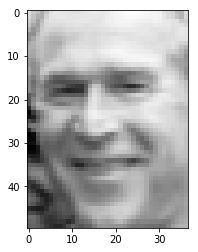

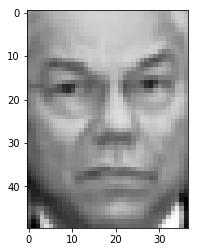

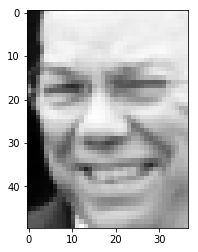

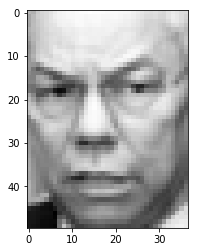

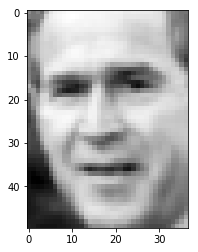

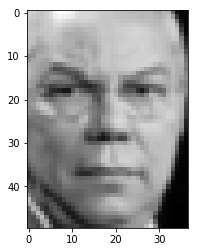

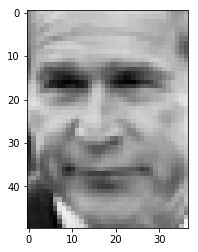

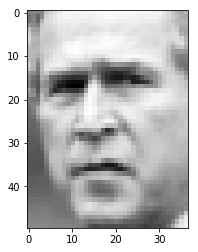

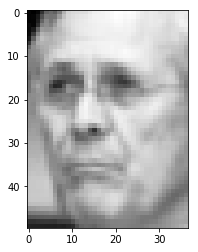

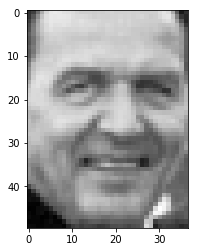

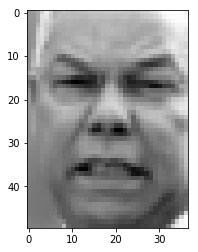

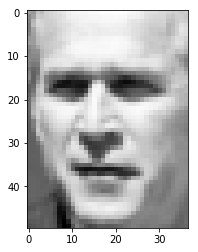

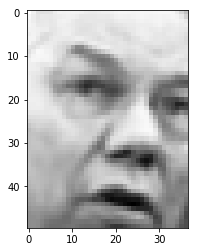

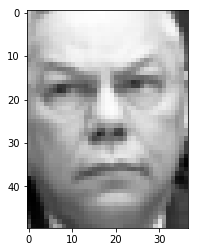

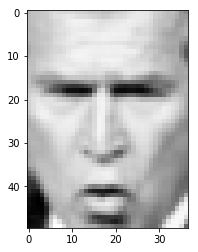

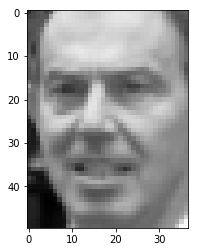

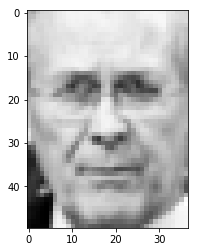

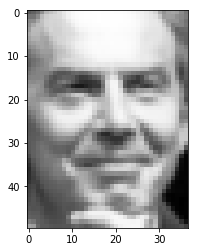

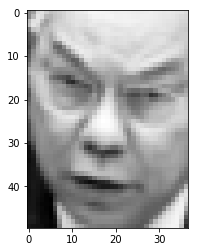

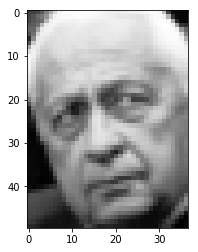

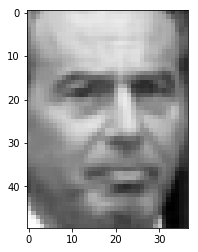

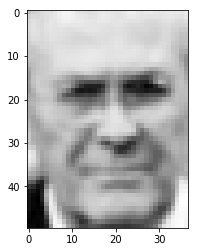

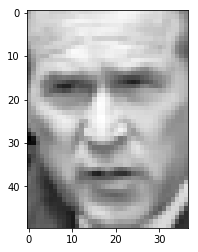

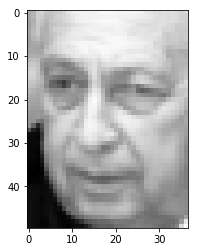

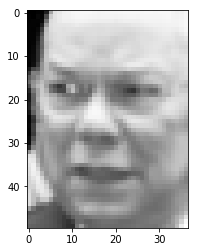

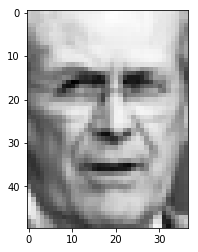

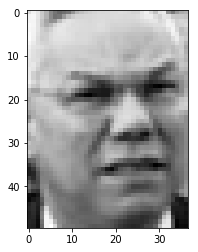

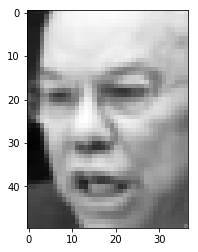

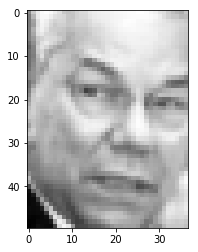

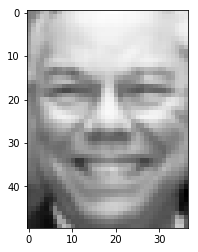

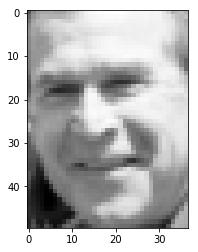

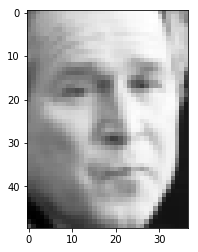

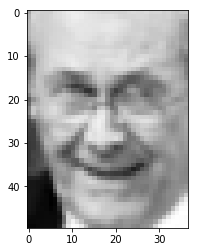

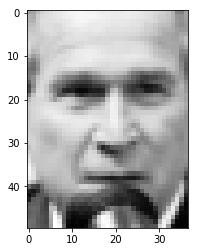

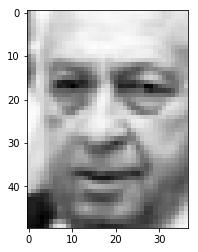

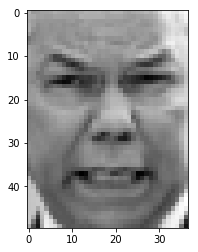

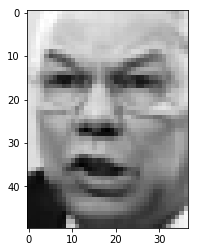

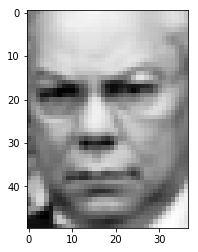

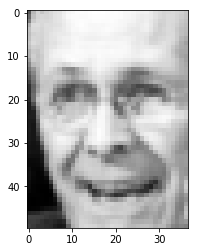

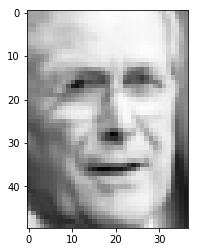

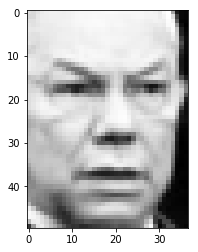

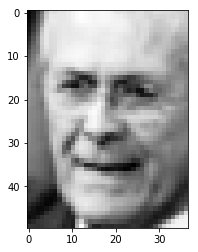

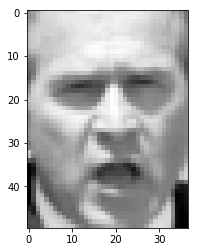

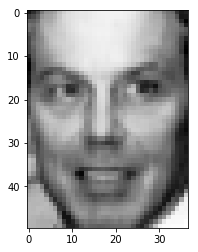

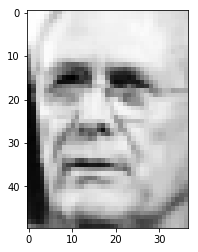

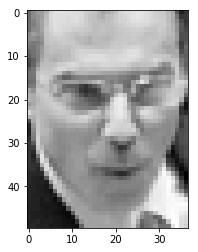

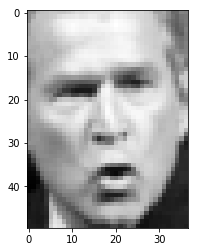

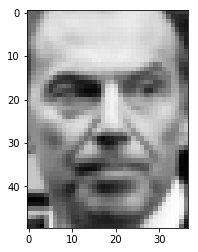

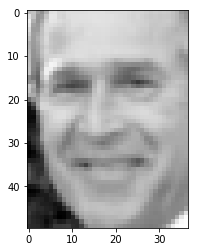

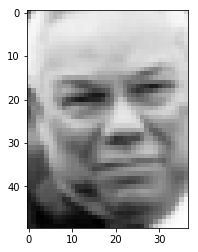

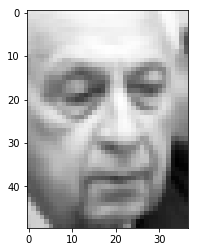

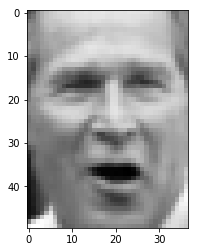

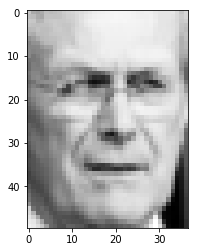

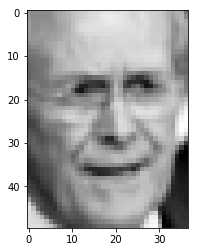

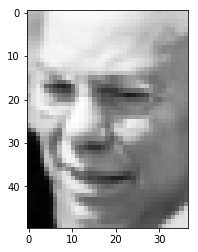

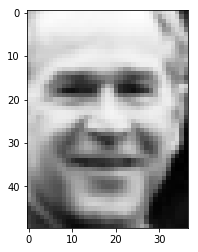

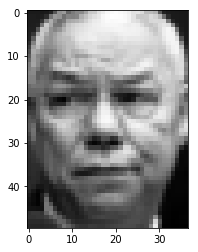

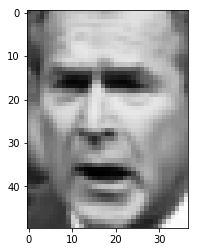

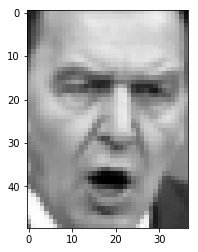

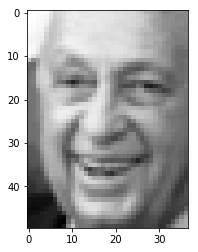

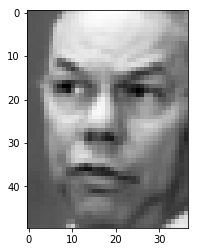

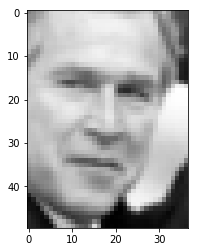

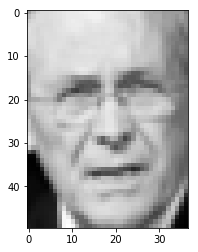

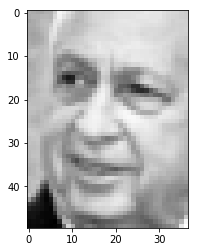

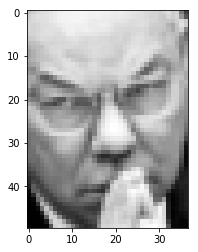

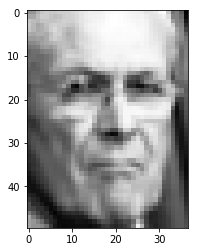

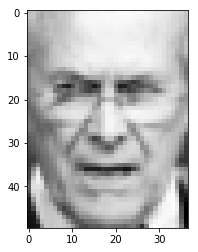

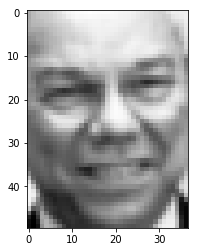

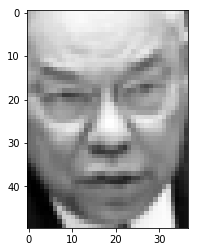

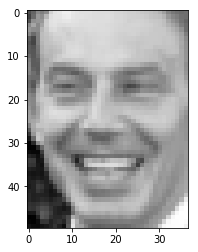

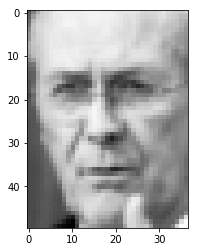

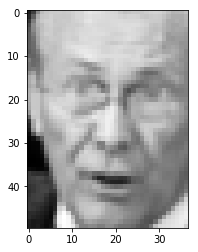

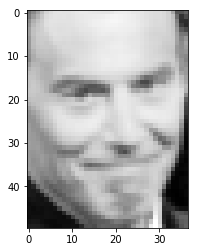

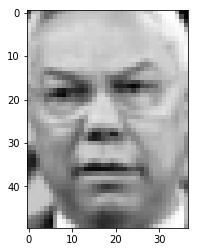

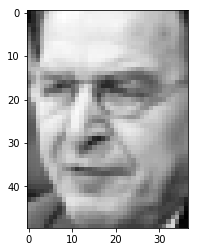

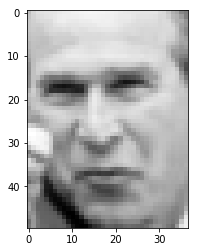

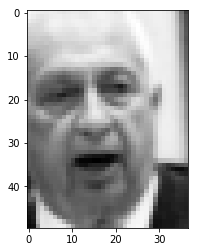

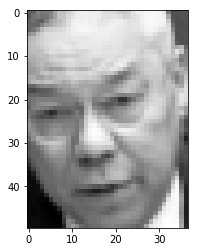

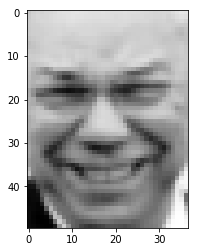

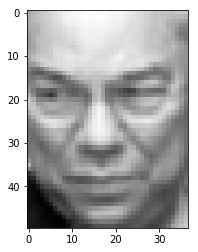

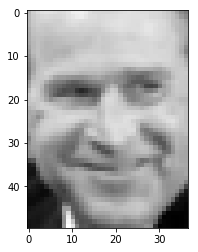

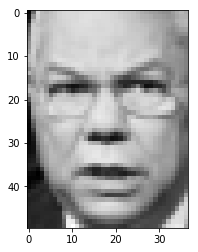

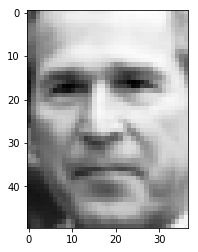

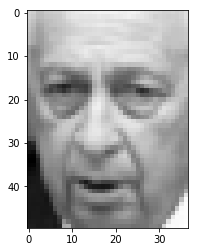

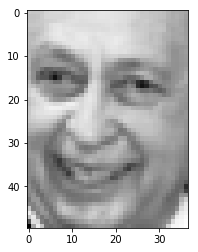

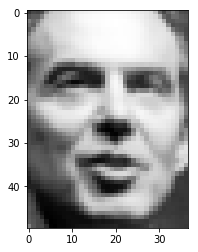

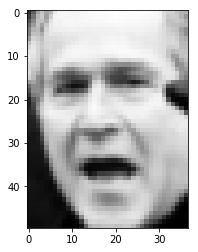

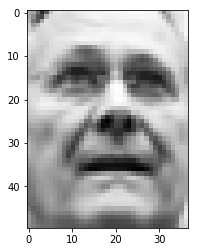

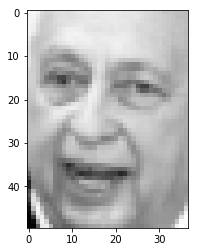

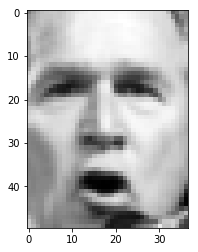

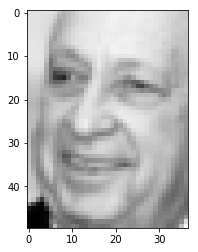

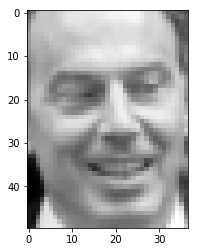

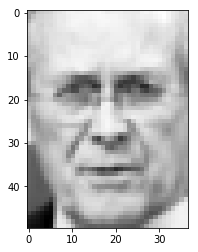

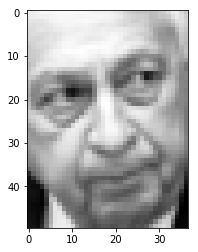

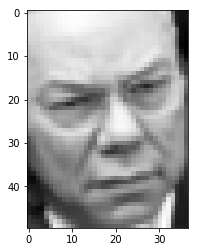

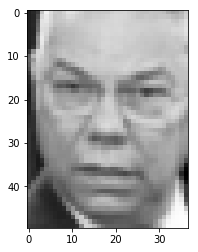

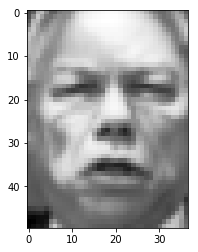

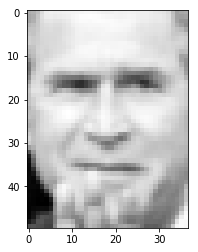

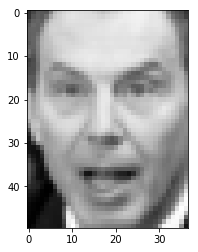

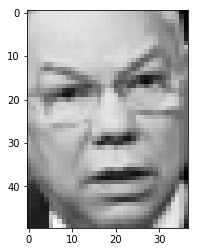

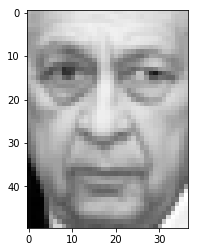

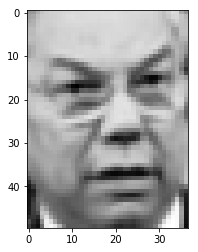

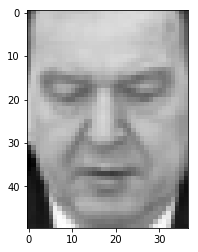

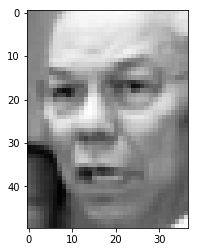

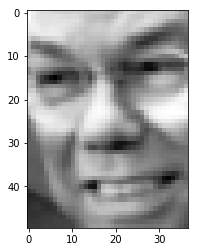

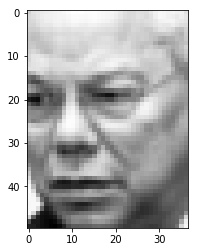

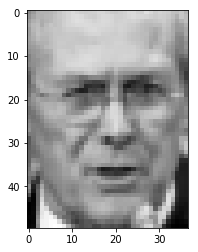

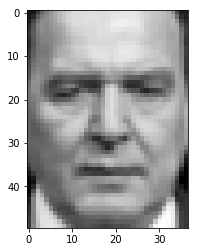

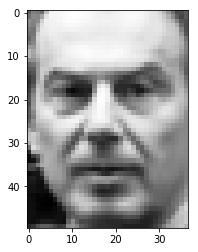

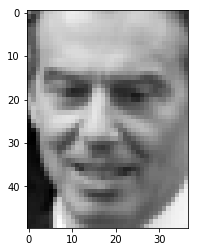

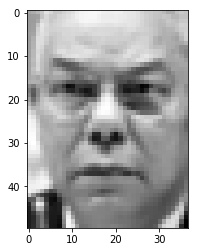

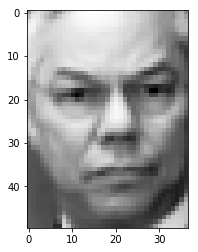

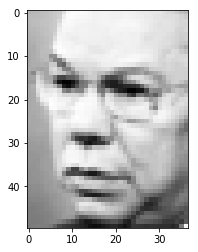

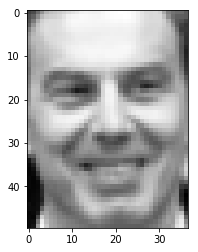

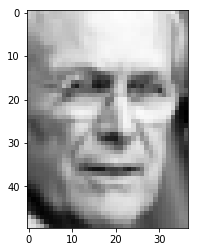

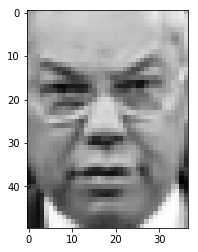

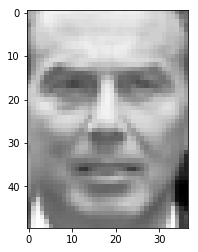

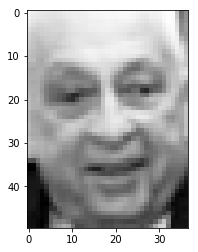

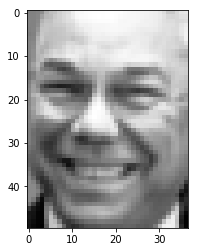

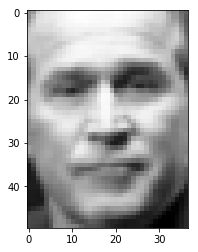

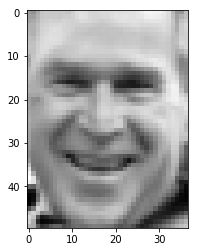

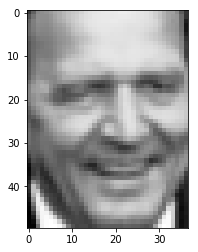

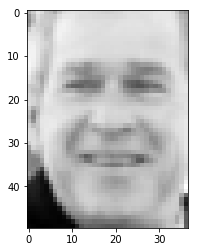

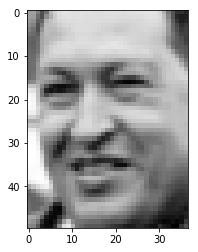

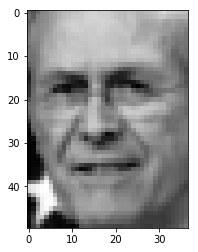

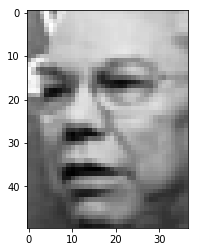

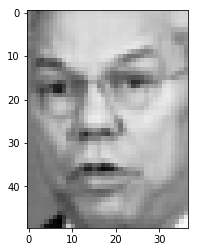

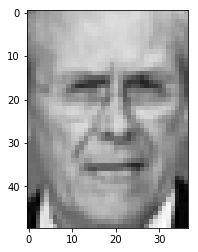

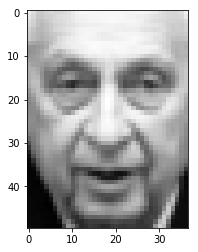

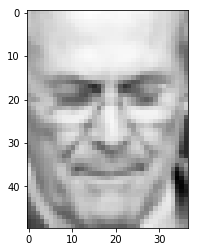

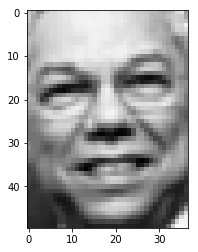

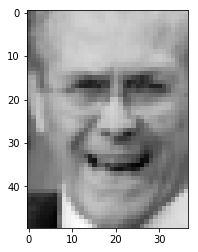

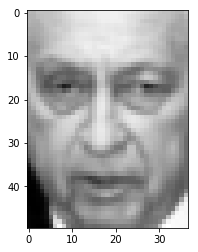

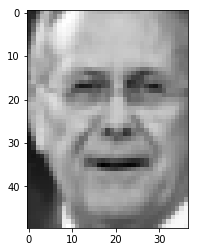

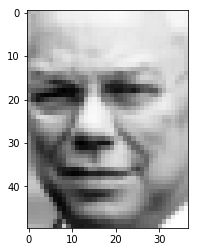

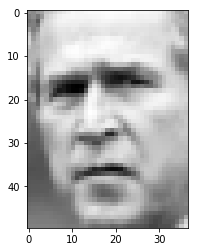

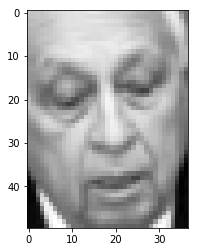

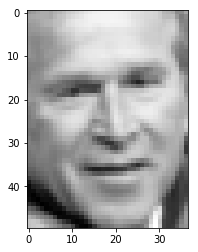

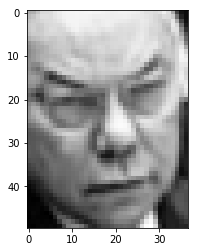

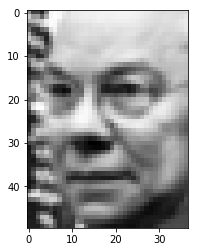

{0, 1, 2, 3, 4, 5, 6}

In [39]:
# фотографии политиков, которых метод kmeans отнес к одному кластеру (с номером 4)
y_list = []
for i in range(len(X)):
    if kmeans_labels[i] == 4:
        plt.imshow(X[i,:].reshape(50, -1), cmap=plt.cm.Greys_r)
        plt.show()
        y_list.append(y[i])
set(y_list)

# DBSCAN

In [43]:
from sklearn.cluster import DBSCAN

In [44]:
for eps in np.arange(900, 1100, 10):
    for min_samples in [3,4,5]:
        labels = DBSCAN(eps=eps, min_samples=min_samples).fit_predict(X)
        if len(np.unique(labels)) == 1: # если разбиение вернуло 1 класс, то идем дальше
            print("noise!", eps, min_samples)
            continue

        metrics = silhouette_score(X, labels)
        print("For eps = {} and min_samples = {} metric is {:.6f}, len = {}".format(eps, min_samples, metrics, len(np.unique(labels))))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 900 and min_samples = 3 metric is -0.244492, len = 8
noise! 900 4
noise! 900 5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 910 and min_samples = 3 metric is -0.240103, len = 8


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 910 and min_samples = 4 metric is -0.118536, len = 2
noise! 910 5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 920 and min_samples = 3 metric is -0.233026, len = 8


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 920 and min_samples = 4 metric is -0.201837, len = 4
noise! 920 5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 930 and min_samples = 3 metric is -0.243437, len = 11


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 930 and min_samples = 4 metric is -0.200390, len = 4


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 930 and min_samples = 5 metric is -0.175958, len = 2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 940 and min_samples = 3 metric is -0.241640, len = 11


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 940 and min_samples = 4 metric is -0.195897, len = 4


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 940 and min_samples = 5 metric is -0.211672, len = 3


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 950 and min_samples = 3 metric is -0.246945, len = 13


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 950 and min_samples = 4 metric is -0.201534, len = 4


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 950 and min_samples = 5 metric is -0.176194, len = 2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 960 and min_samples = 3 metric is -0.245278, len = 13


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 960 and min_samples = 4 metric is -0.209420, len = 5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 960 and min_samples = 5 metric is -0.192030, len = 3


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 970 and min_samples = 3 metric is -0.242121, len = 13


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 970 and min_samples = 4 metric is -0.206556, len = 5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 970 and min_samples = 5 metric is -0.193714, len = 3


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 980 and min_samples = 3 metric is -0.242801, len = 14


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 980 and min_samples = 4 metric is -0.222777, len = 7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 980 and min_samples = 5 metric is -0.215410, len = 5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 990 and min_samples = 3 metric is -0.242952, len = 13


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 990 and min_samples = 4 metric is -0.207226, len = 6


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 990 and min_samples = 5 metric is -0.179694, len = 4


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1000 and min_samples = 3 metric is -0.238896, len = 12


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1000 and min_samples = 4 metric is -0.193983, len = 5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1000 and min_samples = 5 metric is -0.180113, len = 4


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1010 and min_samples = 3 metric is -0.241574, len = 13


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1010 and min_samples = 4 metric is -0.196753, len = 6


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1010 and min_samples = 5 metric is -0.189905, len = 5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1020 and min_samples = 3 metric is -0.242551, len = 13


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1020 and min_samples = 4 metric is -0.186961, len = 5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1020 and min_samples = 5 metric is -0.184979, len = 4


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1030 and min_samples = 3 metric is -0.244142, len = 14


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1030 and min_samples = 4 metric is -0.235623, len = 8


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1030 and min_samples = 5 metric is -0.184014, len = 4


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1040 and min_samples = 3 metric is -0.240433, len = 14


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1040 and min_samples = 4 metric is -0.233244, len = 8


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1040 and min_samples = 5 metric is -0.175147, len = 4


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1050 and min_samples = 3 metric is -0.232658, len = 12


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1050 and min_samples = 4 metric is -0.238876, len = 11


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1050 and min_samples = 5 metric is -0.219842, len = 6


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1060 and min_samples = 3 metric is -0.229055, len = 11


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1060 and min_samples = 4 metric is -0.207808, len = 8


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1060 and min_samples = 5 metric is -0.199201, len = 6


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1070 and min_samples = 3 metric is -0.210612, len = 10


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1070 and min_samples = 4 metric is -0.214273, len = 9


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1070 and min_samples = 5 metric is -0.195621, len = 6


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1080 and min_samples = 3 metric is -0.209693, len = 10


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1080 and min_samples = 4 metric is -0.172160, len = 7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1080 and min_samples = 5 metric is -0.134110, len = 4


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1090 and min_samples = 3 metric is -0.163610, len = 7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1090 and min_samples = 4 metric is -0.132835, len = 5
For eps = 1090 and min_samples = 5 metric is -0.147153, len = 5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


In [45]:
for eps in np.arange(1000, 1150, 10):
    for min_samples in [3,4,5,6,7,8]:
        labels = DBSCAN(eps=eps, min_samples=min_samples).fit_predict(X)
        if len(np.unique(labels)) == 1: # если разбиение вернуло 1 класс, то идем дальше
            print("noise!", eps, min_samples)
            continue

        metrics = silhouette_score(X, labels)
        print("For eps = {} and min_samples = {} metric is {:.6f}, len = {}".format(eps, min_samples, metrics, len(np.unique(labels))))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1000 and min_samples = 3 metric is -0.238896, len = 12


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1000 and min_samples = 4 metric is -0.193983, len = 5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1000 and min_samples = 5 metric is -0.180113, len = 4


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1000 and min_samples = 6 metric is -0.143461, len = 2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1000 and min_samples = 7 metric is -0.152910, len = 2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1000 and min_samples = 8 metric is -0.174574, len = 2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1010 and min_samples = 3 metric is -0.241574, len = 13


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1010 and min_samples = 4 metric is -0.196753, len = 6


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1010 and min_samples = 5 metric is -0.189905, len = 5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1010 and min_samples = 6 metric is -0.137168, len = 2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1010 and min_samples = 7 metric is -0.146901, len = 2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1010 and min_samples = 8 metric is -0.191155, len = 3


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1020 and min_samples = 3 metric is -0.242551, len = 13


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1020 and min_samples = 4 metric is -0.186961, len = 5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1020 and min_samples = 5 metric is -0.184979, len = 4


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1020 and min_samples = 6 metric is -0.175692, len = 3


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1020 and min_samples = 7 metric is -0.176825, len = 3


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1020 and min_samples = 8 metric is -0.144033, len = 2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1030 and min_samples = 3 metric is -0.244142, len = 14


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1030 and min_samples = 4 metric is -0.235623, len = 8


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1030 and min_samples = 5 metric is -0.184014, len = 4


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1030 and min_samples = 6 metric is -0.127956, len = 2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1030 and min_samples = 7 metric is -0.176951, len = 3


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1030 and min_samples = 8 metric is -0.176951, len = 3


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1040 and min_samples = 3 metric is -0.240433, len = 14


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1040 and min_samples = 4 metric is -0.233244, len = 8


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1040 and min_samples = 5 metric is -0.175147, len = 4


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1040 and min_samples = 6 metric is -0.191271, len = 4


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1040 and min_samples = 7 metric is -0.173691, len = 3


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1040 and min_samples = 8 metric is -0.176813, len = 3


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1050 and min_samples = 3 metric is -0.232658, len = 12


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1050 and min_samples = 4 metric is -0.238876, len = 11


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1050 and min_samples = 5 metric is -0.219842, len = 6


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1050 and min_samples = 6 metric is -0.180278, len = 4


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1050 and min_samples = 7 metric is -0.157549, len = 3


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1050 and min_samples = 8 metric is -0.126726, len = 2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1060 and min_samples = 3 metric is -0.229055, len = 11


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1060 and min_samples = 4 metric is -0.207808, len = 8


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1060 and min_samples = 5 metric is -0.199201, len = 6


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1060 and min_samples = 6 metric is -0.194844, len = 5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1060 and min_samples = 7 metric is -0.201624, len = 5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1060 and min_samples = 8 metric is -0.153853, len = 3


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1070 and min_samples = 3 metric is -0.210612, len = 10


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1070 and min_samples = 4 metric is -0.214273, len = 9


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1070 and min_samples = 5 metric is -0.195621, len = 6


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1070 and min_samples = 6 metric is -0.197958, len = 5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1070 and min_samples = 7 metric is -0.176186, len = 4


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1070 and min_samples = 8 metric is -0.173179, len = 4


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1080 and min_samples = 3 metric is -0.209693, len = 10


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1080 and min_samples = 4 metric is -0.172160, len = 7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1080 and min_samples = 5 metric is -0.134110, len = 4


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1080 and min_samples = 6 metric is -0.192020, len = 5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1080 and min_samples = 7 metric is -0.193140, len = 5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1080 and min_samples = 8 metric is -0.173346, len = 4


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1090 and min_samples = 3 metric is -0.163610, len = 7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1090 and min_samples = 4 metric is -0.132835, len = 5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1090 and min_samples = 5 metric is -0.147153, len = 5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1090 and min_samples = 6 metric is -0.154170, len = 4


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1090 and min_samples = 7 metric is -0.185337, len = 5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1090 and min_samples = 8 metric is -0.185926, len = 5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1100 and min_samples = 3 metric is -0.187310, len = 9


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1100 and min_samples = 4 metric is -0.147039, len = 6


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1100 and min_samples = 5 metric is -0.139901, len = 4


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1100 and min_samples = 6 metric is -0.130364, len = 4


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1100 and min_samples = 7 metric is -0.157219, len = 4


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1100 and min_samples = 8 metric is -0.181818, len = 5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1110 and min_samples = 3 metric is -0.189130, len = 9


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1110 and min_samples = 4 metric is -0.145288, len = 6


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1110 and min_samples = 5 metric is -0.137758, len = 4


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1110 and min_samples = 6 metric is -0.107909, len = 3


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1110 and min_samples = 7 metric is -0.155793, len = 4


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1110 and min_samples = 8 metric is -0.160618, len = 4


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1120 and min_samples = 3 metric is -0.187747, len = 10


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1120 and min_samples = 4 metric is -0.123962, len = 5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1120 and min_samples = 5 metric is -0.136800, len = 4


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1120 and min_samples = 6 metric is -0.106458, len = 3


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1120 and min_samples = 7 metric is -0.061252, len = 2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1120 and min_samples = 8 metric is -0.063756, len = 2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1130 and min_samples = 3 metric is -0.186303, len = 10


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1130 and min_samples = 4 metric is -0.123135, len = 5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1130 and min_samples = 5 metric is -0.156368, len = 5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1130 and min_samples = 6 metric is -0.104675, len = 3


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1130 and min_samples = 7 metric is -0.057636, len = 2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1130 and min_samples = 8 metric is -0.059100, len = 2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1140 and min_samples = 3 metric is -0.186035, len = 11


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1140 and min_samples = 4 metric is -0.121186, len = 5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1140 and min_samples = 5 metric is -0.130648, len = 4


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1140 and min_samples = 6 metric is -0.051815, len = 2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 1140 and min_samples = 7 metric is -0.054724, len = 2
For eps = 1140 and min_samples = 8 metric is -0.056095, len = 2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


8 -0.20780775


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


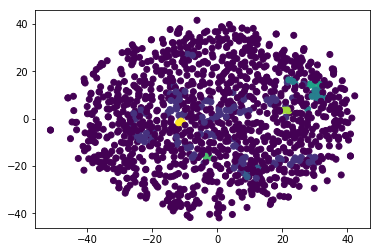

In [47]:
dbscan = DBSCAN(eps=1060, min_samples=4)
dbscan_labels = dbscan.fit_predict(X)
print(len(set(dbscan_labels)), silhouette_score(X, dbscan_labels))
plt.scatter(X_tsne[:,0], X_tsne[:, 1], c=dbscan_labels)

[73, 190, 111, 453, 100, 61, 130, 0]


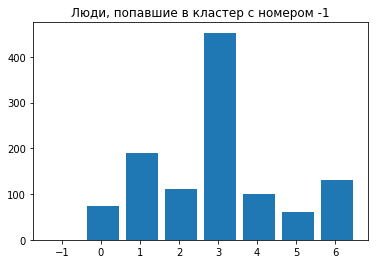

[3, 41, 8, 62, 6, 7, 11, 0]


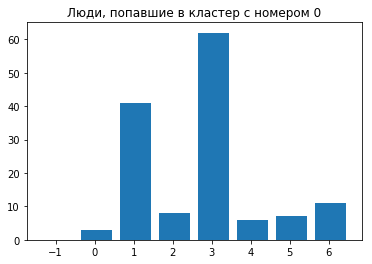

[0, 1, 0, 0, 2, 0, 1, 0]


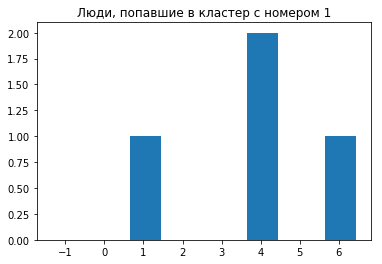

[1, 2, 1, 9, 1, 0, 0, 0]


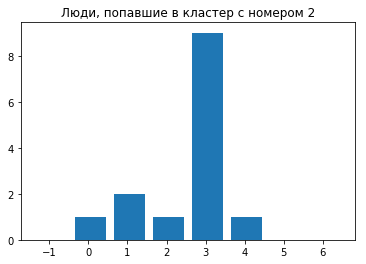

[0, 2, 1, 0, 0, 0, 1, 0]


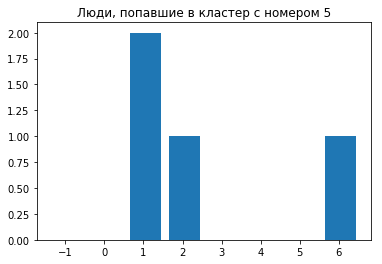

[0, 0, 0, 4, 0, 0, 0, 0]


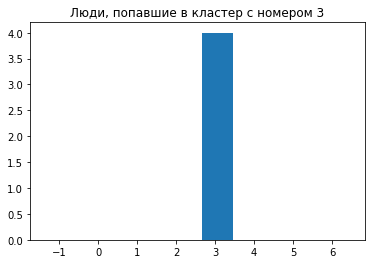

[0, 0, 0, 0, 0, 3, 0, 0]


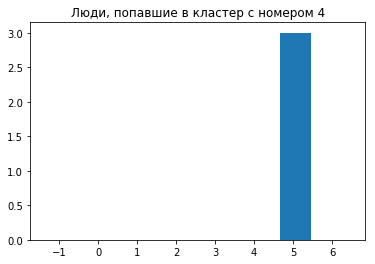

[0, 0, 0, 2, 0, 0, 1, 0]


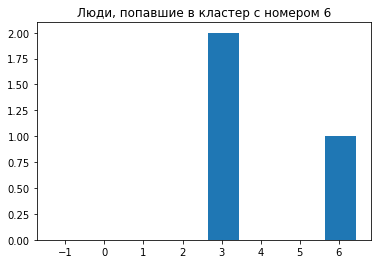

In [48]:
distribution_clusters(X, y, dbscan_labels, len(set(dbscan_labels)))

In [49]:
# отнормируем матрицу Х
X_normed = X / np.linalg.norm(X, axis=0)
X_normed[np.isnan(X_normed)] = 0

In [50]:
X_normed.shape

(1288, 1850)

In [51]:
for eps in np.arange(0.2, 0.32, 0.005):
    for min_samples in [3,4]:
        labels = DBSCAN(eps=eps, min_samples=min_samples).fit_predict(X_normed)
        if len(np.unique(labels)) == 1: # если разбиение вернуло 1 класс, то идем дальше
            print("noise!", eps, min_samples)
            continue

        metrics = silhouette_score(X_normed, labels)
        print("For eps = {} and min_samples = {} metric is {:.6f}, set = {}".format(eps, min_samples, metrics, 
                                                                                    len(set(labels))))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 0.2 and min_samples = 3 metric is -0.244167, set = 9


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 0.2 and min_samples = 4 metric is -0.210566, set = 4


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 0.20500000000000002 and min_samples = 3 metric is -0.245491, set = 10


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 0.20500000000000002 and min_samples = 4 metric is -0.202998, set = 4


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 0.21000000000000002 and min_samples = 3 metric is -0.245345, set = 12


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 0.21000000000000002 and min_samples = 4 metric is -0.234654, set = 6


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 0.21500000000000002 and min_samples = 3 metric is -0.216365, set = 7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 0.21500000000000002 and min_samples = 4 metric is -0.205318, set = 5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 0.22000000000000003 and min_samples = 3 metric is -0.234927, set = 11


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 0.22000000000000003 and min_samples = 4 metric is -0.200762, set = 5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 0.22500000000000003 and min_samples = 3 metric is -0.231971, set = 12


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 0.22500000000000003 and min_samples = 4 metric is -0.223603, set = 7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 0.23000000000000004 and min_samples = 3 metric is -0.210020, set = 10


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 0.23000000000000004 and min_samples = 4 metric is -0.227166, set = 9


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 0.23500000000000004 and min_samples = 3 metric is -0.216340, set = 11


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 0.23500000000000004 and min_samples = 4 metric is -0.173903, set = 5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 0.24000000000000005 and min_samples = 3 metric is -0.193503, set = 8


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 0.24000000000000005 and min_samples = 4 metric is -0.171354, set = 7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 0.24500000000000005 and min_samples = 3 metric is -0.180587, set = 9


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 0.24500000000000005 and min_samples = 4 metric is -0.176713, set = 6


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 0.25000000000000006 and min_samples = 3 metric is -0.155894, set = 8


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 0.25000000000000006 and min_samples = 4 metric is -0.157161, set = 7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 0.25500000000000006 and min_samples = 3 metric is -0.176059, set = 8


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 0.25500000000000006 and min_samples = 4 metric is -0.141213, set = 6


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 0.26000000000000006 and min_samples = 3 metric is -0.153840, set = 7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 0.26000000000000006 and min_samples = 4 metric is -0.104192, set = 4


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 0.26500000000000007 and min_samples = 3 metric is -0.146269, set = 6


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 0.26500000000000007 and min_samples = 4 metric is -0.093573, set = 4


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 0.2700000000000001 and min_samples = 3 metric is -0.134332, set = 7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 0.2700000000000001 and min_samples = 4 metric is -0.102547, set = 4


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 0.2750000000000001 and min_samples = 3 metric is -0.144953, set = 9


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 0.2750000000000001 and min_samples = 4 metric is -0.090761, set = 4


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 0.2800000000000001 and min_samples = 3 metric is -0.130228, set = 7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 0.2800000000000001 and min_samples = 4 metric is -0.071445, set = 3


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 0.2850000000000001 and min_samples = 3 metric is -0.121299, set = 8


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 0.2850000000000001 and min_samples = 4 metric is 0.008787, set = 3


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 0.2900000000000001 and min_samples = 3 metric is -0.088861, set = 6


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 0.2900000000000001 and min_samples = 4 metric is -0.015721, set = 4


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 0.2950000000000001 and min_samples = 3 metric is 0.028596, set = 3


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 0.2950000000000001 and min_samples = 4 metric is 0.017264, set = 3


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 0.3000000000000001 and min_samples = 3 metric is 0.034651, set = 3


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 0.3000000000000001 and min_samples = 4 metric is 0.073510, set = 2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 0.3050000000000001 and min_samples = 3 metric is 0.041644, set = 3


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 0.3050000000000001 and min_samples = 4 metric is 0.085384, set = 2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 0.3100000000000001 and min_samples = 3 metric is 0.083269, set = 3


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 0.3100000000000001 and min_samples = 4 metric is 0.097283, set = 2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For eps = 0.3150000000000001 and min_samples = 3 metric is 0.088401, set = 3
For eps = 0.3150000000000001 and min_samples = 4 metric is 0.104306, set = 2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


{0, 1, 2, 3, 4, 5, 6, -1} -0.098166585


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


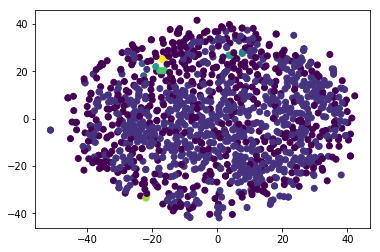

In [52]:
dbscan = DBSCAN(eps=0.2885, min_samples=3)
dbscan_normed_labels = dbscan.fit_predict(X_normed)
print(set(dbscan_normed_labels), silhouette_score(X_normed, dbscan_normed_labels))
plt.scatter(X_tsne[:,0], X_tsne[:, 1], c=dbscan_normed_labels)

[73, 190, 111, 453, 100, 61, 130, 0]


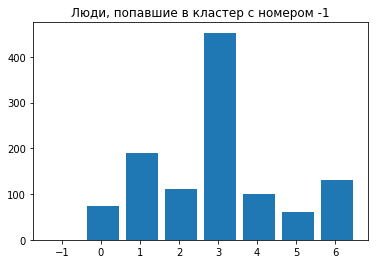

[3, 41, 8, 62, 6, 7, 11, 0]


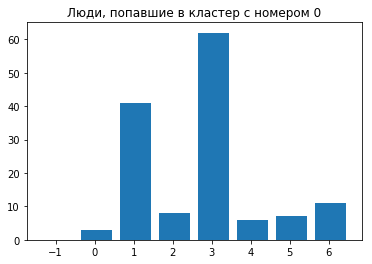

[0, 1, 0, 0, 2, 0, 1, 0]


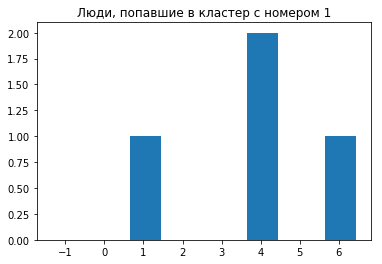

[1, 2, 1, 9, 1, 0, 0, 0]


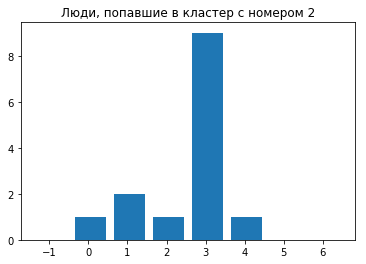

[0, 2, 1, 0, 0, 0, 1, 0]


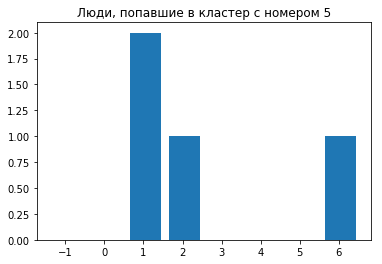

[0, 0, 0, 4, 0, 0, 0, 0]


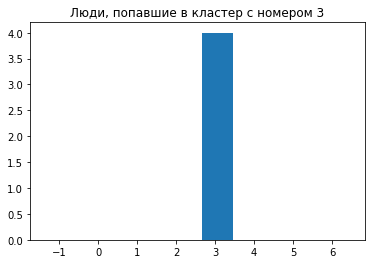

[0, 0, 0, 0, 0, 3, 0, 0]


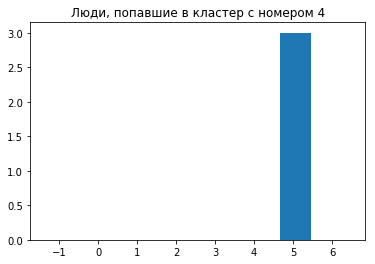

[0, 0, 0, 2, 0, 0, 1, 0]


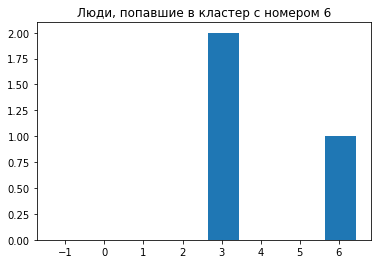

In [53]:
distribution_clusters(X, y, dbscan_labels, len(set(dbscan_labels)))

In [54]:
set(dbscan_normed_labels)

{-1, 0, 1, 2, 3, 4, 5, 6}

In [55]:
silhouette_score(X, dbscan_normed_labels)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


-0.10670279

Очень тяжело идет подбор параметров для метода DBSCAN. Почти все объекты попали в шум. Если же чуть увеличить eps и min_samples, то все скатывается в единственный кластер. Т.к. мы знаем, что реально кластеров 7 (с учетом шума -- 8), то выведена картинка именно для таких параметров, которые дают нужный результат. Хотя в кластерах оказывается 3-4 человека, что весьма печально. Лучшего разбиения, к сожалению, добиться не удалось.

# Homework (Part 2)

1. Напишите код итерации по эпохам. Напиши код для визуализации процесса обучения и подсчета метрики на валидации после каждой эпохи.
2. Обучить автокодировщик. Добейтесь низкого лосса на валидации.
3. Сгенерируйте 16 новых изображений. Возьмите случайный вектор нужной длины и подайте его на вход декодеру. Нарисуйте эти изображения.

In [56]:
X = lfw_people['images']

In [57]:
X = (X/255)*2-1

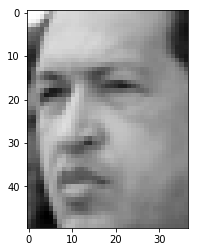

In [58]:
plt.imshow(X[0], cmap=plt.cm.Greys_r)

In [59]:
import torch

In [60]:
from torch.utils.data import TensorDataset, DataLoader

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test = train_test_split(X, test_size=0.1)

In [63]:
X_train.shape

(1159, 50, 37)

In [65]:
X_test.shape

torch.Size([129, 50, 37])

In [64]:
X_train = torch.tensor(X_train, dtype=torch.float32, requires_grad=True)
X_test = torch.tensor(X_test, dtype=torch.float32, requires_grad=False)
dataset_train = TensorDataset(X_train, torch.zeros(len(X_train)))
dataset_test = TensorDataset(X_test, torch.zeros(len(X_test)))

In [66]:
train_loader = DataLoader(dataset_train, batch_size=19, shuffle=True)
test_loader = DataLoader(dataset_test, batch_size=43, shuffle=False)

In [67]:
class Autoencoder(torch.nn.Module): 
    def __init__(self): 
        super(Autoencoder, self).__init__()
        self.encoder = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=2), 
            torch.nn.ReLU(),
            
            torch.nn.Conv2d(in_channels=32, out_channels=64, stride=2, kernel_size=3),
            torch.nn.ReLU(),
            
            torch.nn.Conv2d(in_channels=64, out_channels=64, stride=2, kernel_size=3),
            torch.nn.ReLU(),
            
            torch.nn.Conv2d(in_channels=64, out_channels=64, stride=2, kernel_size=3)
        )
        
        self.decoder = torch.nn.Sequential( 
            torch.nn.ConvTranspose2d(in_channels=64, out_channels=64, kernel_size=3, stride=1),
            torch.nn.Upsample(scale_factor=2), # операция увеличения картинки по некоторому правилу
            
            torch.nn.ConvTranspose2d(in_channels=64, out_channels=64, kernel_size=3, stride=1),
            torch.nn.Upsample(scale_factor=2), # увеличить картинку в 2 раза
            
            
            torch.nn.ConvTranspose2d(in_channels=64, out_channels=32, kernel_size=3, stride=1),
            torch.nn.Upsample(scale_factor=2),
            
            
            torch.nn.ConvTranspose2d(in_channels=32, out_channels=1, kernel_size=(7,2), stride=1)
        )
  
    def encode(self, X):
        encoded_X = self.encoder(X) # применить encoder к Х
        #print(encoded_X.shape) # (*) посмотрим какого размера картинка до преобразования в вектор
        batch_size = X.shape[0] 
        return encoded_X.reshape(batch_size, -1) # превращаем картинку в тензор векторов
    
    def decode(self, X): # на вход придет вектор
        # вектор, который пришел в декодер, должен быть такого же размера, что и вектор (*)
        pre_decoder = X.reshape(-1, 64, 2, 1) # -1 -- размер батча, 128 -- размер канала, 
        return self.decoder(pre_decoder)

In [170]:
model = Autoencoder()

In [175]:
sample = X_test[:1]
sample = sample[:, None] 
print(sample.shape)
result = model.decode(model.encode(sample))
print(result.shape)

torch.Size([1, 1, 50, 37])
torch.Size([1, 1, 50, 37])


C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\modules\upsampling.py:129: UserWarning: nn.Upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.{} is deprecated. Use nn.functional.interpolate instead.".format(self.name))


In [176]:
print(result.detach().numpy().min())
print(result.detach().numpy().max())

-0.34666485
0.037825212


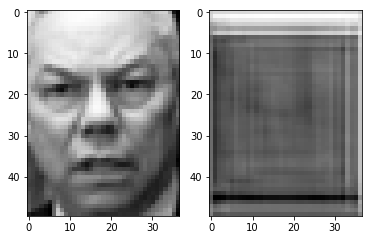

In [177]:
# до обучения
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
ax1.imshow(sample[0][0].detach().numpy(), cmap=plt.cm.Greys_r)
ax2.imshow(result[0][0].detach().numpy(), cmap=plt.cm.Greys_r)
plt.show() 

In [178]:
loss = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [179]:
history_train = []
history_test = []

for i in range(30):              # если еще увеличить число эпох, то модель начнет переобучаться
    for x, y in train_loader:
        l = 0
        x = x[:, None]

        model.train()
        
        decoded_x = model.decode(model.encode(x))
        mse_loss = loss(decoded_x, x)
        
        
        mse_loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        l += mse_loss.detach().numpy()   # суммарная ошибка по эпохе
      
    history_train.append(l)
    
    model.eval()
    with torch.no_grad():
        for x, y in test_loader:
            l = 0
            x = x[:, None]
            
            result_x = model.decode(model.encode(x))
            loss_test = loss(result_x, x)
            
            l += loss_test.detach().numpy()
        
        history_test.append(l)
            

C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\modules\upsampling.py:129: UserWarning: nn.Upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.{} is deprecated. Use nn.functional.interpolate instead.".format(self.name))


<function matplotlib.pyplot.show(*args, **kw)>

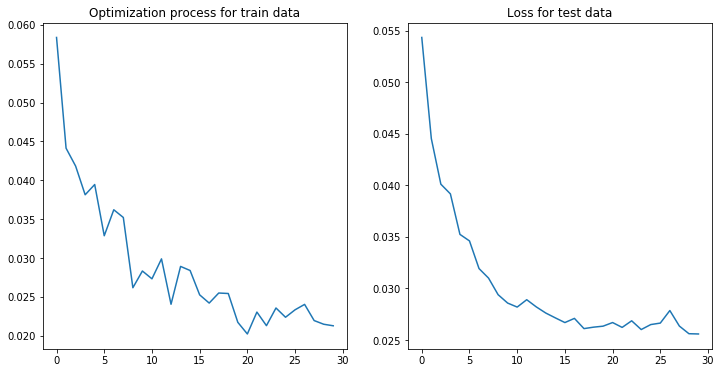

In [180]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.plot(history_train)
plt.title("Optimization process for train data")


plt.subplot(1, 2, 2)
plt.plot(history_test)
plt.title("Loss for test data")

plt.show

In [181]:
with torch.no_grad():
    model.eval()
    res1 = model.decode(model.encode(sample))

C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\modules\upsampling.py:129: UserWarning: nn.Upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.{} is deprecated. Use nn.functional.interpolate instead.".format(self.name))


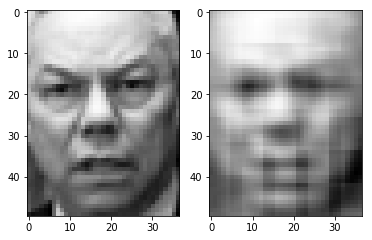

In [182]:
# после обучения
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
ax1.imshow(sample[0][0].detach().numpy(), cmap=plt.cm.Greys_r)
ax2.imshow(res1[0][0].detach().numpy(), cmap=plt.cm.Greys_r)
plt.show()

Сгенерируем 16 новых изображений из случайных векторов

C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\modules\upsampling.py:129: UserWarning: nn.Upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.{} is deprecated. Use nn.functional.interpolate instead.".format(self.name))


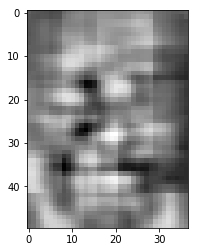

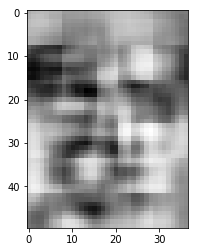

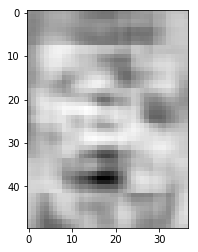

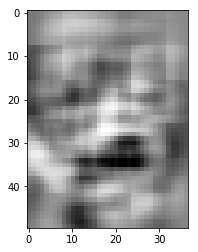

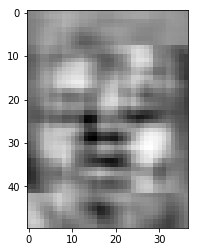

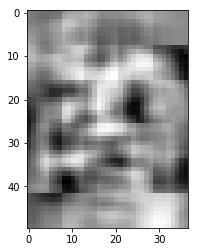

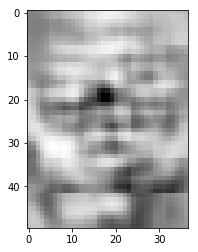

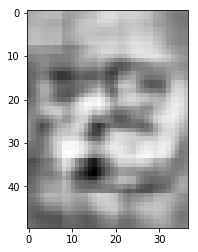

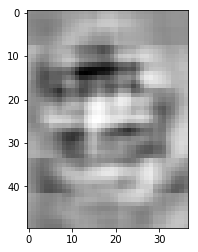

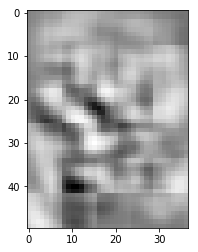

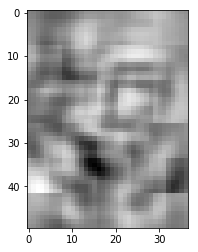

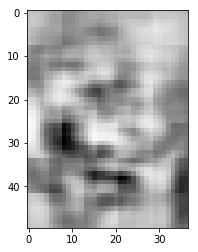

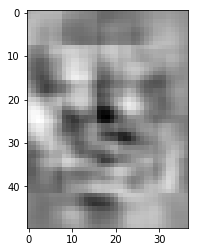

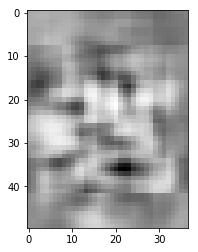

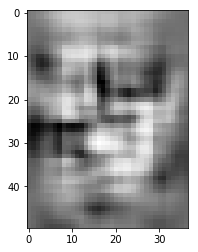

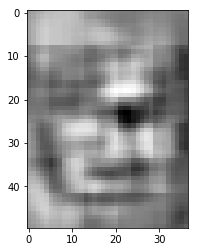

In [194]:
for i in range(16):
    rand_x = torch.rand((1,64,2,1))
    rand_x = (rand_x)*2 - 1               # переведем в промежуток [-1; 1]
    plt.imshow(model.decode(rand_x)[0][0].detach().numpy(), cmap=plt.cm.Greys_r)
    plt.show()

Изображения весьма отдаленно напоминают лица. Но, если проявить фантазию, все-таки что-то можно разглядеть.